In [22]:
import pandas as pd
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Load your data into a DataFrame (replace 'your_data.csv' with your data file)
file_path = 'Updated_MOST_RELEVANT.xlsx'
df = pd.read_excel(file_path)

# Preprocess the text data (assuming the text is in a column named 'content')
# Convert text to lowercase
df['content'] = df['content'].astype(str).str.lower()

# Tokenize the text (split into words)
tokenized_text = df['content'].apply(lambda x: x.split())

# Create a Gensim Dictionary and Corpus
dictionary = Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Specify the number of topics
num_topics = 20  # Change this to your desired number of topics

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

# Print the topics and their top words
for topic_id, topic_words in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(f'Topic {topic_id + 1}: {topic_words}')

# Optional: Assign topics to documents
df['topic_id'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

# Save the results back to a CSV file (if needed)
# df.to_csv('lda_results.csv', index=False)


Topic 1: 0.104*"great" + 0.099*"to" + 0.092*"easy" + 0.089*"and" + 0.055*"use" + 0.044*"app" + 0.042*"very" + 0.029*"useful" + 0.017*"use." + 0.017*"it's"
Topic 2: 0.194*"best" + 0.145*"the" + 0.109*"airline" + 0.054*"airlines" + 0.047*"in" + 0.041*"world" + 0.036*"one" + 0.032*"of" + 0.028*"ever" + 0.027*"app"
Topic 3: 0.033*"can" + 0.031*"it" + 0.030*"can't" + 0.028*"is" + 0.027*"the" + 0.024*"i" + 0.018*"app" + 0.017*"as" + 0.017*"a" + 0.016*"booking"
Topic 4: 0.070*"to" + 0.035*"the" + 0.028*"not" + 0.027*"you" + 0.021*"and" + 0.016*"helpful" + 0.016*"it" + 0.015*"app" + 0.014*"your" + 0.012*"in"
Topic 5: 0.069*"apps" + 0.062*"other" + 0.046*"missing" + 0.027*"well" + 0.026*"than" + 0.024*"too" + 0.023*"flights" + 0.023*"some" + 0.022*".." + 0.022*"all"
Topic 6: 0.042*"app" + 0.041*"so" + 0.032*"the" + 0.030*"pakistan" + 0.025*"user" + 0.023*"friendly" + 0.018*"in" + 0.017*"this" + 0.017*"you" + 0.016*"much"
Topic 7: 0.070*"i" + 0.062*"my" + 0.048*"to" + 0.034*"it" + 0.021*"the" + 

In [23]:
import stanza
import pandas as pd

# Load your DataFrame from the Excel file
df = pd.read_excel('Updated_MOST_RELEVANT.xlsx')

# Initialize the Stanza pipeline with the 'tokenize' processor
nlp = stanza.Pipeline('en', processors='tokenize')

# Define a function to tokenize sentences and assign comment IDs
def tokenize_sentences_and_assign_ids(row):
    comment_id = row['id']  # Assuming you have a column named 'id' for comment IDs
    text = row['content']  # Assuming you have a column named 'content' for text data
    text = str(text)

    # Process the text with Stanza
    doc = nlp(text)

    # Initialize variables for sentence splitting
    sentences = []
    current_sentence = []

    # Iterate through tokens and use punctuation to split sentences
    for sentence in doc.sentences:
        for token in sentence.tokens:
            current_sentence.append(token.text)

            # Check if the token is a punctuation that indicates the end of a sentence
            if token.text in ('.', '!', '?'):
                sentences.append(current_sentence)
                current_sentence = []

    # If there are remaining tokens in the current sentence, add them
    if current_sentence:
        sentences.append(current_sentence)

    # Convert the list of sentences into a list of strings
    sentences = [' '.join(sentence) for sentence in sentences]

    return {'comment_id': comment_id, 'sentences': sentences}

# Apply the function to each row and create a list of dictionaries
tokenized_data = df.apply(tokenize_sentences_and_assign_ids, axis=1)

# Flatten the list of dictionaries and create a new DataFrame
tokenized_sentences = [{'comment_id': entry['comment_id'], 'sentence': sentence} for entry in tokenized_data for sentence in entry['sentences']]
new_df = pd.DataFrame(tokenized_sentences)

# Print the DataFrame with the tokenized sentences and comment IDs
print(new_df)

# Save the DataFrame to a new CSV file while preserving comment IDs
new_df.to_csv('tokenized.csv', index=False)

# You can also save it to Excel if needed
#new_df.to_excel('tokenized.xlsx', index=False, engine='openpyxl')


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Done loading processors!


       comment_id                                           sentence
0               1                               the app works well .
1               1                                          however .
2               1  it does not allow you to save the passengers i...
3               1  so , if you get kicked out or want to change d...
4               1  this is very annoying and not worth the 10 % o...
...           ...                                                ...
18445       12484             have all along been waiting for this .
18446       12485                                      very nice app
18447       12486                                    working great !
18448       12487  this is a great start .. very easy to navigate...
18449       12488  just downloaded but does n't work on my htc se...

[18450 rows x 2 columns]


In [4]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Load the tokenized sentences from a CSV file (replace 'tokenized.csv' with your file path)
file_path = 'tokenized.csv'
df = pd.read_csv(file_path)

# Extract text data from the 'sentence' column and convert to lowercase
df['content'] = df['sentence'].astype(str)
df['content'] = df['content'].str.lower()
tweets = df['content']

# Define a list of community-related terms
community_terms = [
    'time', 'website', 'update', 'interface', 'helpful', 'upgrade', 'information', 'email',
    'staff', 'function', 'check in', 'verification', 'service', 'luggage', 'booking', 'bug',
    'log', 'flight', 'response', 'customer', 'Help', 'ticket', 'offers', 'passenger', 'app',
    'process', 'crew', 'loading', 'services', 'custom', 'user', 'crash', 'promotions', 'experience'
]

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize words in a sentence
def lemmatize_sentence(sentence):
    words = nltk.word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Rule-based filtering to extract tweets with community-related terms
extracted_tweets = []

for tweet in tweets:
    lemmatized_tweet = lemmatize_sentence(tweet)

    # Check if any of the community terms are present in the lemmatized tweet
    if any(term in lemmatized_tweet for term in community_terms):
        extracted_tweets.append(tweet)

# Print the extracted tweets that contain community-related terms
for idx, tweet in enumerate(extracted_tweets, start=1):
    print(f"{idx}. {tweet}")


Streaming output truncated to the last 5000 lines.
3937. using the app in doha itself , still not showing karachi in the destinations .
3938. please update to improvethe review .
3939. i dont know who has designed and who has approved the app , but there are no pakistan cities listed
3940. unable to send boarding pass after online check in .
3941. the older app was so much better in browsing flights etc .. this new interface sucks ..
3942. bland interface and very unhelpful workability .
3943. app working 100 % never had any probelm .
3944. does n't do anything and mostly divert to website
3945. whats the use of installing this app if need to visit desktop site then ?
3946. i checked in but no email or sms confirmation received .
3947. qatar airways is five star flight only fare is high sometimes
3948. qatar airways very good app or very ezzy too use
3949. very good app and work very nice but i hope qatar airways reduce the prices of the busines class tickets
3950. who approved this ap

In [25]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources if you haven't already
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Read the CSV file into a DataFrame
df = pd.read_csv('tokenized.csv')

# Preprocessing
stop_words = set(stopwords.words('english'))

# Define aspects and their associated keywords with weights
aspects_keywords_weights = {
    'flight': (['flight'], 0.8),
    'app': (['app'], 0.7),
    'trip': (['trip'], 0.6),
    'time': (['time'], 0.5),
    'ticket': (['ticket'], 0.4),
    'customer': (['customer'], 0.8),
    'get': (['get'], 0.7),
    'airport': (['airport'], 0.6),
    'booking': (['booking'], 0.5),
    'service': (['service'], 0.4),
    'airway': (['airway'], 0.8),
    'qatar': (['qatar'], 0.7),
    'price': (['price'], 0.6),
    'update': (['update'], 0.5),
    'bad': (['bad'], 0.4),
    'easy': (['easy'], 0.8),
    'love': (['love'], 0.7),
    'world': (['world'], 0.6),
    'ever': (['ever'], 0.5),
    'excellent': (['excellent'], 0.4),
    'nice': (['nice'], 0.8),
    'best': (['best'], 0.7),
    'great': (['great'], 0.6),
    'use': (['use'], 0.5),
    'job': (['job'], 0.4),
    'information': (['information'], 0.8),
    'helpful': (['helpful'], 0.7),
    'staff': (['staff'], 0.6),
    'experience': (['experience'], 0.5),
    'check in': (['check in'], 0.4),
    'check out': (['check out'], 0.8),
    'process': (['process'], 0.7),
    'promotions': (['promotions'], 0.6),
    'passenger': (['passenger'], 0.5),
    'offers': (['offers'], 0.4),
    'luggage': (['luggage'], 0.8),
    'services': (['services'], 0.7),
    'response': (['response'], 0.6),
    'good': (['good'], 0.5),
    'website': (['website'], 0.4),
    'bug': (['bug'], 0.8),
    'loading': (['loading'], 0.7),
    'interface': (['interface'], 0.6),
    'custom': (['custom'], 0.5),
    'user': (['user'], 0.4),
    'log': (['log'], 0.8),
    'responce': (['responce'], 0.7),
    'email': (['email'], 0.6),
    'verification': (['verification'], 0.5),
    'function': (['function'], 0.4),
    'upgrade': (['upgrade'], 0.8),
    'crash': (['crash'], 0.7),
    'reliabe': (['reliabe'], 0.6),
    'Help': (['Help'], 0.5),
    'crew': (['crew'], 0.4)
}

# Initialize the Sentiment Intensity Analyzer (SIA)
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment based on aspects and keywords with weights
def analyze_aspect_sentiment(text):
    if isinstance(text, str):
        sentiment_scores = sia.polarity_scores(text)

        aspect_sentiments = {}
        aspect_sentiments_score = {}

        # Iterate through aspects and their associated keywords
        for aspect, (keywords, weight) in aspects_keywords_weights.items():
            aspect_keywords_present = any(keyword in text for keyword in keywords)
            if aspect_keywords_present:
                # Calculate a weighted sentiment score
                weighted_compound = sentiment_scores['compound'] * weight
                aspect_sentiments_score[aspect] = weighted_compound

                # Determine sentiment labels based on the score
                if weighted_compound >= 0.08:
                    aspect_sentiments[aspect] = 'Positive'
                elif weighted_compound <= -0.01:
                    aspect_sentiments[aspect] = 'Negative'
                else:
                    aspect_sentiments[aspect] = 'Neutral'

        return aspect_sentiments, aspect_sentiments_score
    else:
        return {}, {}

# Apply sentiment analysis to the 'content' column
df[['aspect_sentiments', 'aspect_sentiments_score']] = df['sentence'].apply(lambda x: analyze_aspect_sentiment(x) if pd.notna(x) else ({}, {})).apply(pd.Series)

# Calculate sentiment percentages for each aspect and overall
aspect_percentage = {}
total_reviews = len(df)
overall_sentiments = {'Positive': 0, 'Negative': 0, 'Neutral': 0}

for aspect in aspects_keywords_weights.keys():
    # Count negative and positive sentiment mentions for each aspect
    aspect_negative_count = df['aspect_sentiments'].apply(lambda x: x.get(aspect, 'Neutral') == 'Negative').sum()
    aspect_positive_count = df['aspect_sentiments'].apply(lambda x: x.get(aspect, 'Neutral') == 'Positive').sum()

    # Calculate percentage of negative and positive sentiments for the aspect
    percentage_negative = (aspect_negative_count / total_reviews) * 100
    percentage_positive = (aspect_positive_count / total_reviews) * 100
    aspect_percentage[aspect] = {'Negative': percentage_negative, 'Positive': percentage_positive}

    # Accumulate sentiment counts for overall sentiment calculation
    overall_sentiments['Negative'] += aspect_negative_count
    overall_sentiments['Positive'] += aspect_positive_count

# Calculate overall sentiment percentage
overall_percentage_negative = (overall_sentiments['Negative'] / total_reviews) * 100
overall_percentage_positive = (overall_sentiments['Positive'] / total_reviews) * 100

# Normalize the percentages for each aspect to ensure they add up to 100%
for aspect in aspect_percentage.keys():
    total_aspect_percentages = sum(aspect_percentage[aspect].values())
    for sentiment in aspect_percentage[aspect].keys():
        aspect_percentage[aspect][sentiment] /= total_aspect_percentages
        aspect_percentage[aspect][sentiment] *= 100

# Print the results
for aspect, percentages in aspect_percentage.items():
    print(f"{aspect} has {percentages['Negative']:.2f}% negative and {percentages['Positive']:.2f}% positive sentiments.")

print(f"Overall, {overall_percentage_negative:.2f}% are negative and {overall_percentage_positive:.2f}% are positive sentiments.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


flight has 46.12% negative and 53.88% positive sentiments.
app has 39.92% negative and 60.08% positive sentiments.
trip has 60.00% negative and 40.00% positive sentiments.
time has 62.32% negative and 37.68% positive sentiments.
ticket has 58.02% negative and 41.98% positive sentiments.
customer has 58.45% negative and 41.55% positive sentiments.
get has 60.14% negative and 39.86% positive sentiments.
airport has 69.16% negative and 30.84% positive sentiments.
booking has 50.56% negative and 49.44% positive sentiments.
service has 26.74% negative and 73.26% positive sentiments.
airway has 17.73% negative and 82.27% positive sentiments.
qatar has 23.39% negative and 76.61% positive sentiments.
price has 43.48% negative and 56.52% positive sentiments.
update has 51.46% negative and 48.54% positive sentiments.
bad has 94.16% negative and 5.84% positive sentiments.
easy has 2.79% negative and 97.21% positive sentiments.
love has 0.40% negative and 99.60% positive sentiments.
world has 12.8

<ipython-input-25-4311327114b1>:136: RuntimeWarning: invalid value encountered in double_scalars
  aspect_percentage[aspect][sentiment] /= total_aspect_percentages


In [26]:
# Apply sentiment analysis to the 'content' column, handling non-string and empty values
df['aspect_sentiments'], df['aspect_sentiments_score'] = zip(*df['sentence'].apply(lambda x: analyze_aspect_sentiment(x) if pd.notna(x) else ({}, {})))

# Create a new dataset with content, label, positive score, negative score, and topic
new_df = pd.DataFrame(columns=['id','content', 'label', 'label_score', 'positive_score', 'negative_score', 'topic'])

# Iterate through rows in the original DataFrame
for index, row in df.iterrows():
    content = row['sentence']
    label = row['aspect_sentiments']
    label_score = row['aspect_sentiments_score']
    id = row['comment_id']

    # Check if content is not NaN or empty
    if pd.notna(content) and content.strip():
        # Analyze positive and negative sentiment scores using VADER
        positive_score = sia.polarity_scores(content)['pos']
        negative_score = sia.polarity_scores(content)['neg']
        topic = None  # You can assign the topic based on your analysis

    else:
        # If content is NaN or empty, set scores and topic to None
        positive_score = None
        negative_score = None
        topic = None

    # Append the analyzed data to the new DataFrame
    new_df = new_df.append({'id': id, 'content': content, 'label': label, 'label_score': label_score, 'positive_score': positive_score, 'negative_score': negative_score, 'topic': topic}, ignore_index=True)

# Print the new dataset
print(new_df)

# Save the new_df DataFrame as a CSV file
new_df.to_csv('sentiment_analysis_results_lastone1.csv', index=False)


Streaming output truncated to the last 5000 lines.
<ipython-input-26-4055c044cf98>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'id': id, 'content': content, 'label': label, 'label_score': label_score, 'positive_score': positive_score, 'negative_score': negative_score, 'topic': topic}, ignore_index=True)
<ipython-input-26-4055c044cf98>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'id': id, 'content': content, 'label': label, 'label_score': label_score, 'positive_score': positive_score, 'negative_score': negative_score, 'topic': topic}, ignore_index=True)
<ipython-input-26-4055c044cf98>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'id': id

          id                                            content  \
0          1                               the app works well .   
1          1                                          however .   
2          1  it does not allow you to save the passengers i...   
3          1  so , if you get kicked out or want to change d...   
4          1  this is very annoying and not worth the 10 % o...   
...      ...                                                ...   
18445  12484             have all along been waiting for this .   
18446  12485                                      very nice app   
18447  12486                                    working great !   
18448  12487  this is a great start .. very easy to navigate...   
18449  12488  just downloaded but does n't work on my htc se...   

                                                   label  \
0                                    {'app': 'Positive'}   
1                                    {'ever': 'Neutral'}   
2      {'inform

In [27]:
#['time', 'website', 'update', 'interface', 'helpful', 'upgrade', 'information', 'email', 'staff', 'function', 'check in', 'verification', 'service', 'luggage', 'booking', 'bug', 'log', 'flight', 'response', 'customer', 'Help', 'ticket', 'offers', 'passenger', 'app', 'process', 'crew', 'loading', 'services', 'custom', 'user', 'crash', 'promotions', 'experience']
import pandas as pd
# Read the CSV file into a DataFrame
df = pd.read_csv('sentiment_analysis_results_lastone1.csv')  # Replace 'your_data.csv'which was saved in last cell

# Define a function to process the 'label_score' column
def process_label_score(group):
    # Create an empty dictionary to store aggregated scores
    aggregated_scores = {}

    # Iterate through rows in the group
    for row in group['label_score']:
        for aspect, score in eval(row).items():  # Assuming the 'label_score' column contains string representations of dictionaries
            if aspect in aggregated_scores:
                # If the aspect already exists, add the score to the existing value
                aggregated_scores[aspect].append(score)
            else:
                # If the aspect is new, create a list with the score
                aggregated_scores[aspect] = [score]

    # Calculate the mean score for each aspect
    for aspect, scores in aggregated_scores.items():
        if len(scores) > 1:
            aggregated_scores[aspect] = sum(scores) / len(scores)
        else:
            aggregated_scores[aspect] = scores[0]

    return aggregated_scores

# Group the DataFrame by 'id' and apply the processing function
result = df.groupby('id').apply(process_label_score).reset_index()

# Create a summary row for each 'id'
summary_rows = []
for _, row in result.iterrows():
    summary_row = {
        'id': row['id'],
    }
    for aspect, score in row.items():
        if aspect != 'id':
            summary_row[aspect] = score
    summary_rows.append(summary_row)

# Create a DataFrame for summary rows
summary_df = pd.DataFrame(summary_rows)
df_1 = pd.read_excel('Updated_MOST_RELEVANT.xlsx')  # Replace 'your_data.csv' with the actual file path
df_1 = df_1['score']
summary_df['score'] = df_1
# Save the summary DataFrame to a new CSV file
summary_df.to_csv('summary_data.csv', index=False)  # Replace 'summary_data.csv' with your desired file name


In [28]:
import pandas as pd

# Define the list of column names
column_names = ['time', 'website', 'update', 'interface', 'helpful', 'upgrade', 'information', 'email', 'staff', 'function', 'check in', 'verification', 'service', 'luggage', 'booking', 'bug', 'log', 'flight', 'response', 'customer', 'Help', 'ticket', 'offers', 'passenger', 'app', 'process', 'crew', 'loading', 'services', 'custom', 'user', 'crash', 'promotions', 'experience']

# Read the CSV file into a DataFrame
df = pd.read_csv('summary_data.csv')  # Replace 'your_input_file.csv' with your CSV file path

# Create a new DataFrame with the columns from the list
new_df = pd.DataFrame(columns=column_names)

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    # Create a dictionary from the string representation in the CSV column
    data_dict = eval(row['0'])  # Replace 'your_dict_column' with the name of your dictionary column

    # Create a dictionary to hold the values for the new columns
    new_row_data = {col: data_dict.get(col, 0) for col in column_names}

    # Append the row to the new DataFrame
    new_df = new_df.append(new_row_data, ignore_index=True)


df_1 = pd.read_csv('summary_data.csv')  # Replace 'your_data.csv' with the actual file path
new_df['score'] = df_1['score']
new_df['id'] = df_1['id']



columns = new_df.columns.tolist()
columns = ['id'] + [col for col in columns if col != 'id']
# Reorder the DataFrame columns
new_df = new_df[columns]



# Save the new DataFrame to a CSV file
new_df.to_csv('output_file.csv', index=False)  # Replace 'output_file.csv' with your desired output file name


Streaming output truncated to the last 5000 lines.
<ipython-input-28-0e6d5762dd39>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row_data, ignore_index=True)
<ipython-input-28-0e6d5762dd39>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row_data, ignore_index=True)
<ipython-input-28-0e6d5762dd39>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row_data, ignore_index=True)
<ipython-input-28-0e6d5762dd39>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row_data, ignore_index=True)
<ipython-input-28-0e6d5762dd39>:21: Futur

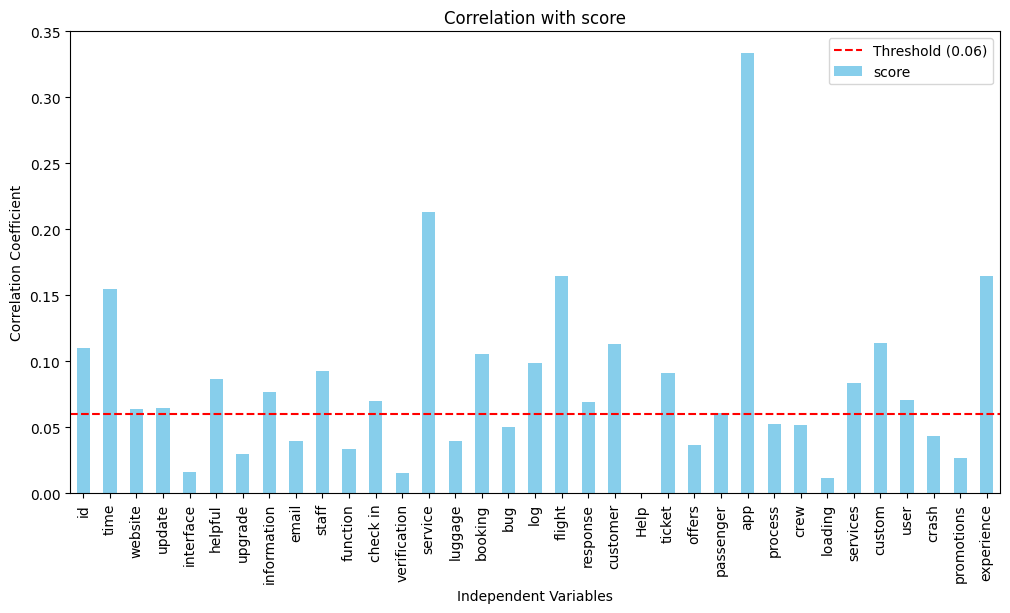

Aspects with correlation above 0.06:
['id', 'time', 'website', 'update', 'helpful', 'information', 'staff', 'check in', 'service', 'booking', 'log', 'flight', 'response', 'customer', 'ticket', 'passenger', 'app', 'services', 'custom', 'user', 'experience', 'score']


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace 'your_data.csv' with your file path)
data = pd.read_csv('output_file.csv')

# Assuming 'score' is the name of your target variable
target_variable = 'score'

# Calculate correlations with the target variable
correlations = data.corr()[target_variable]

# Define your correlation threshold
correlation_threshold = 0.06

# Filter aspects based on the threshold
high_correlation_aspects = correlations[correlations > correlation_threshold]

# Visualize the correlations
plt.figure(figsize=(12, 6))
correlations.drop(target_variable).plot(kind='bar', color='skyblue')
plt.axhline(y=correlation_threshold, color='red', linestyle='--', label=f'Threshold ({correlation_threshold})')
plt.title(f'Correlation with {target_variable}')
plt.xlabel('Independent Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90, ha='center')
plt.legend()
plt.show()

# List of aspects with correlations above the threshold
high_correlation_aspect_list = high_correlation_aspects.index.tolist()
print(f'Aspects with correlation above {correlation_threshold}:')
print(high_correlation_aspect_list)


Kendall's Tau Correlation Coefficient for "time": 0.51


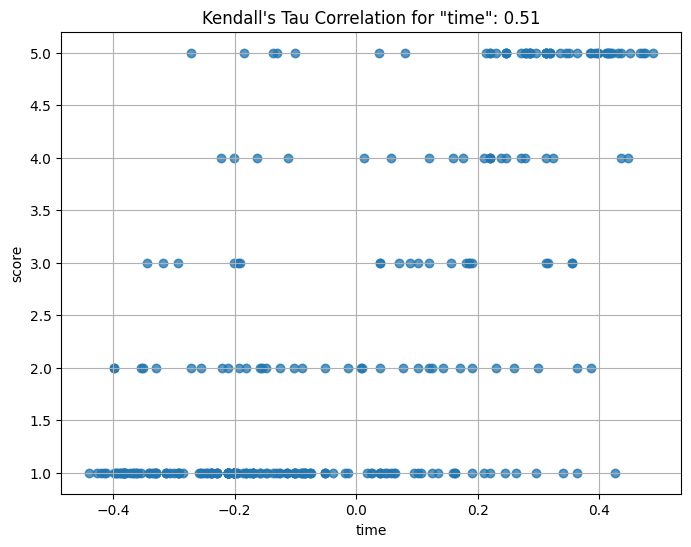

Kendall's Tau Correlation Coefficient for "website": 0.19


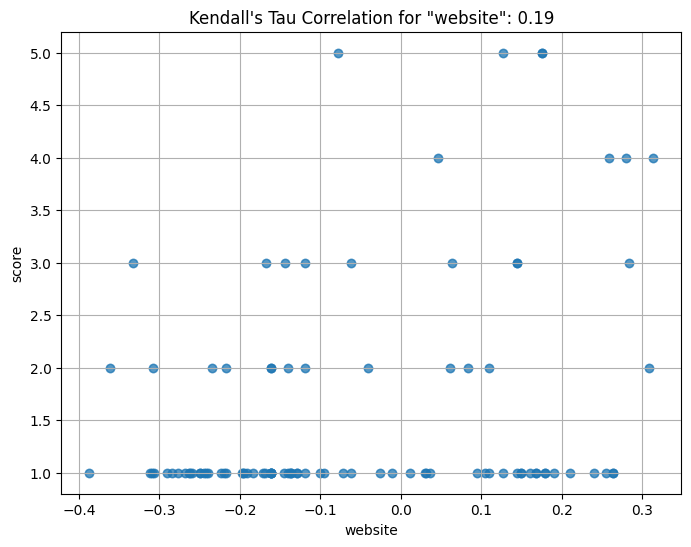

Kendall's Tau Correlation Coefficient for "update": 0.45


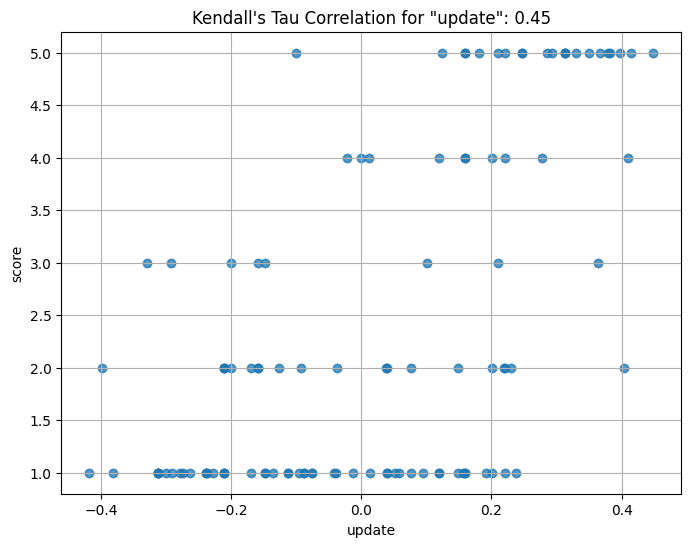

Kendall's Tau Correlation Coefficient for "helpful": 0.53


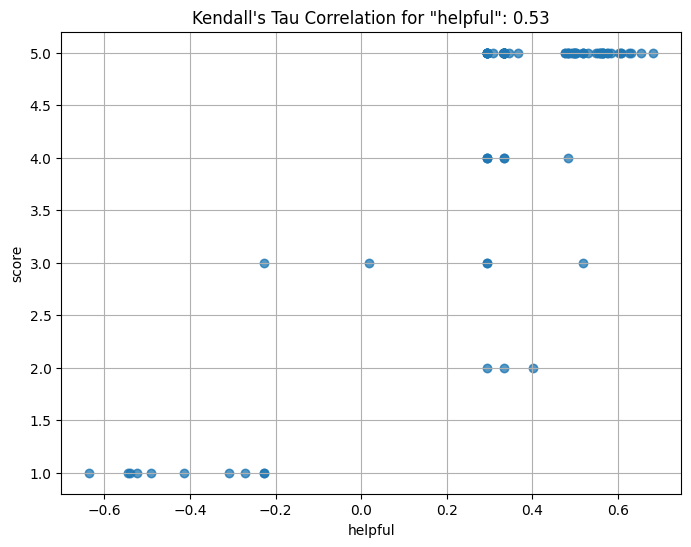

Kendall's Tau Correlation Coefficient for "information": 0.58


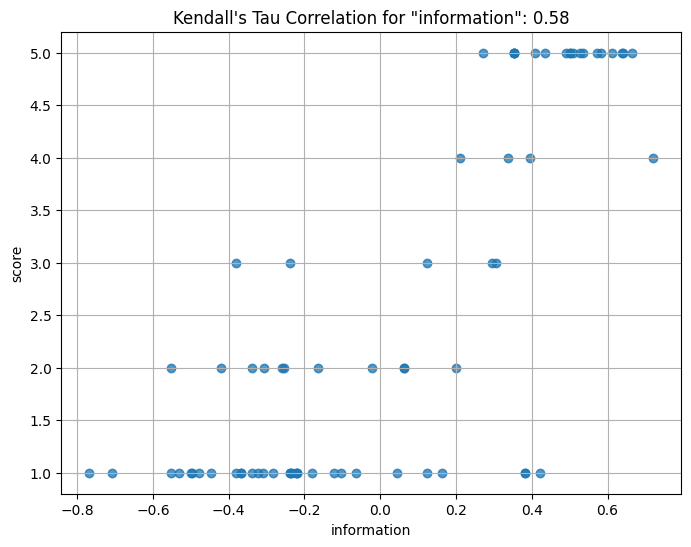

Kendall's Tau Correlation Coefficient for "staff": 0.64


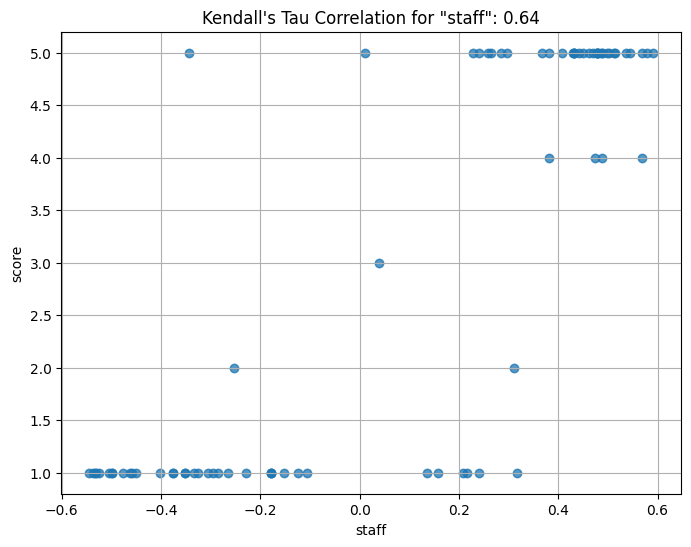

Kendall's Tau Correlation Coefficient for "check in": 0.35


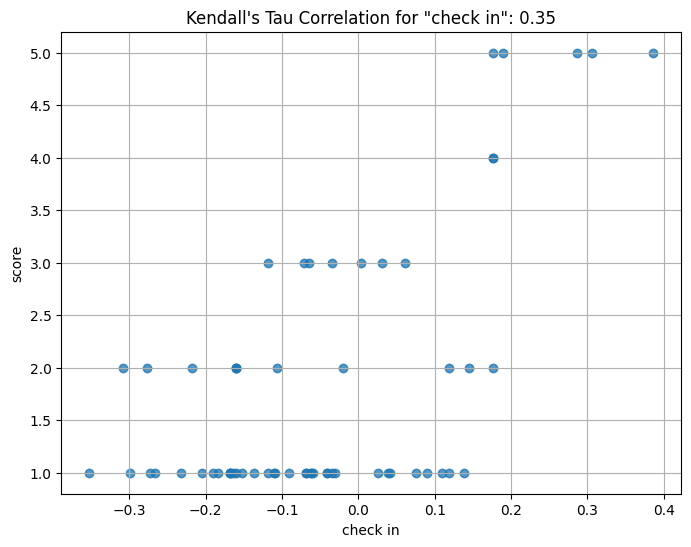

Kendall's Tau Correlation Coefficient for "service": 0.57


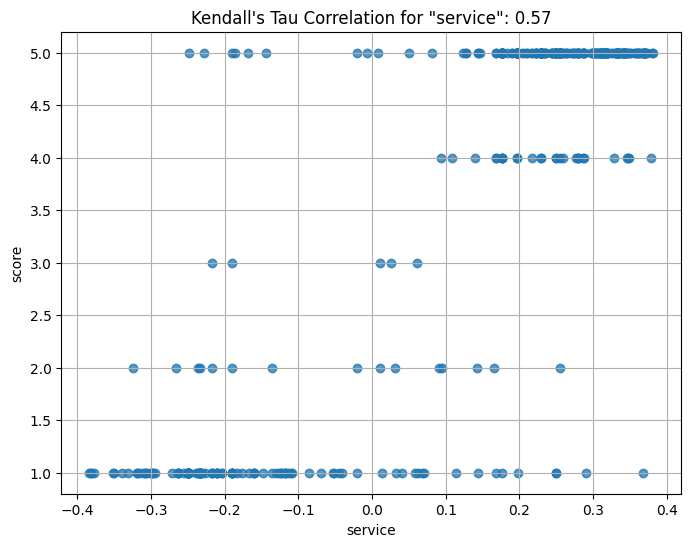

Kendall's Tau Correlation Coefficient for "booking": 0.52


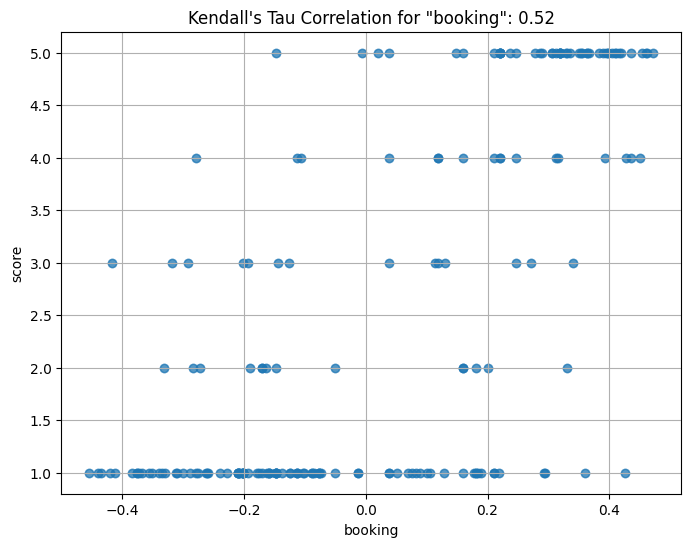

Kendall's Tau Correlation Coefficient for "log": 0.17


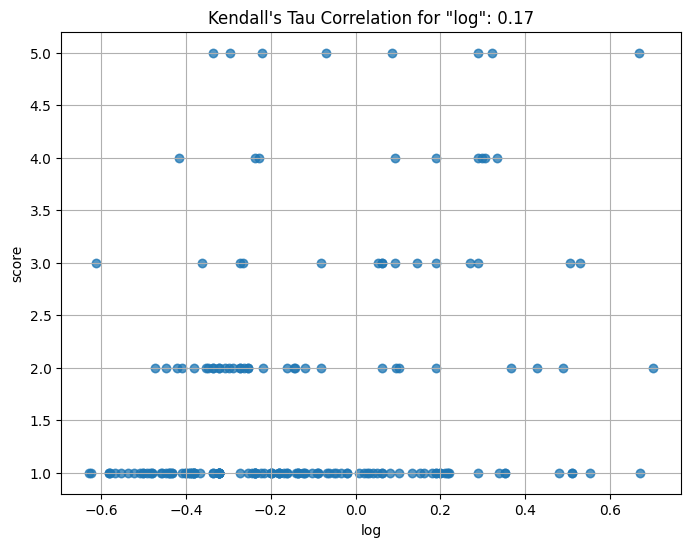

Kendall's Tau Correlation Coefficient for "flight": 0.55


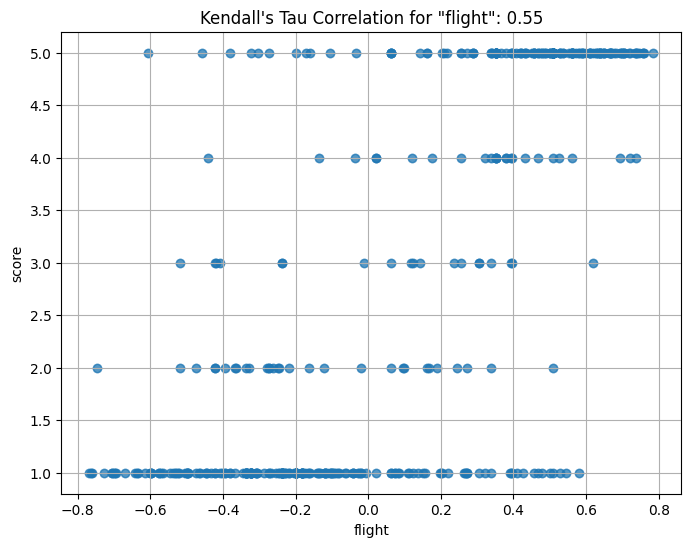

Kendall's Tau Correlation Coefficient for "response": 0.35


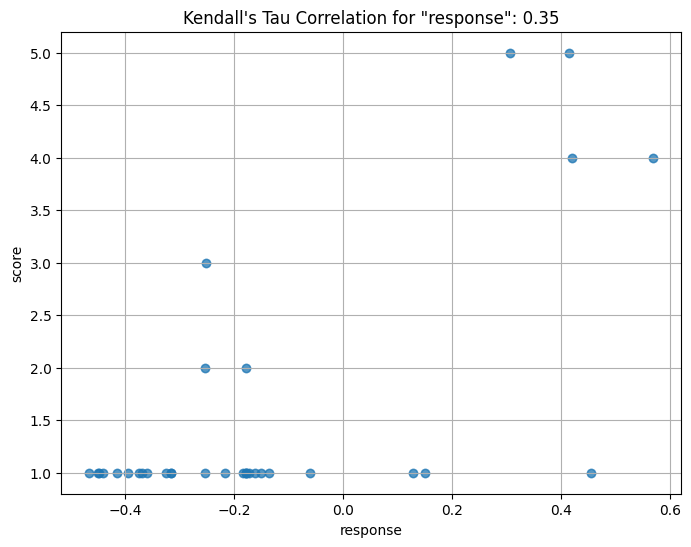

Kendall's Tau Correlation Coefficient for "customer": 0.49


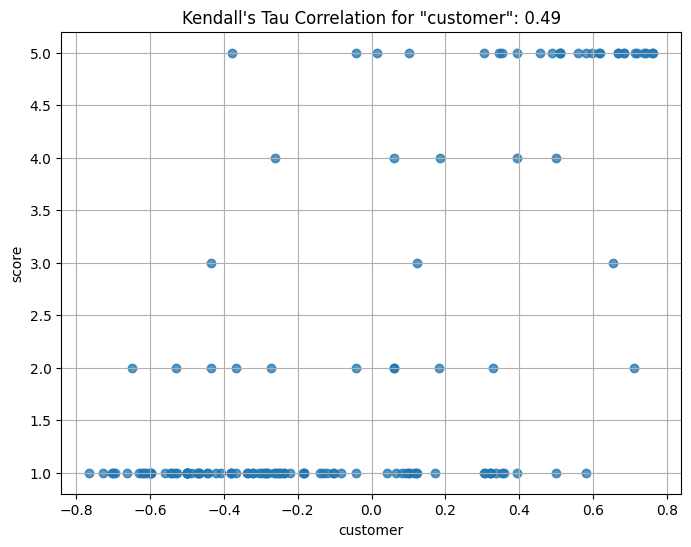

Kendall's Tau Correlation Coefficient for "ticket": 0.47


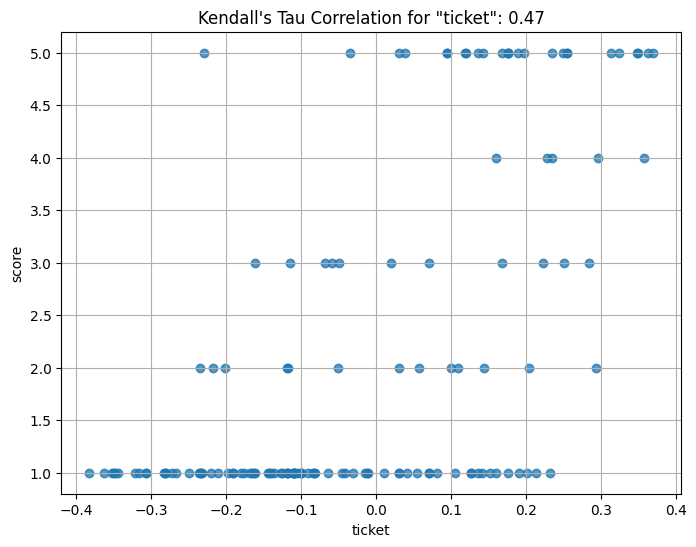

Kendall's Tau Correlation Coefficient for "passenger": 0.59


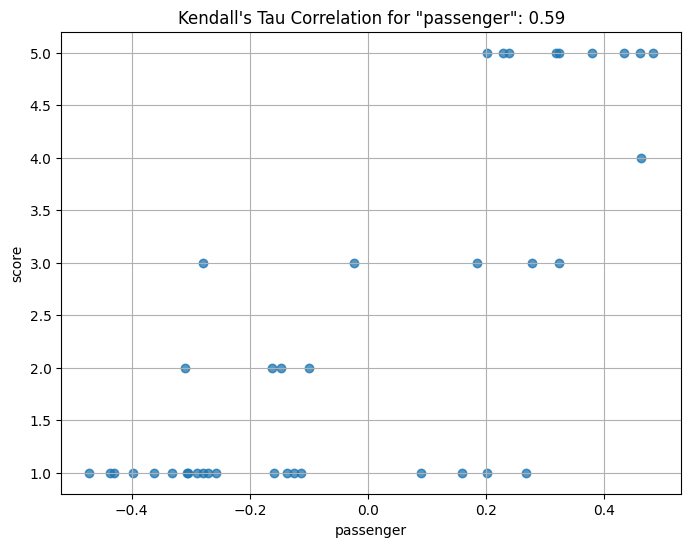

Kendall's Tau Correlation Coefficient for "app": 0.61


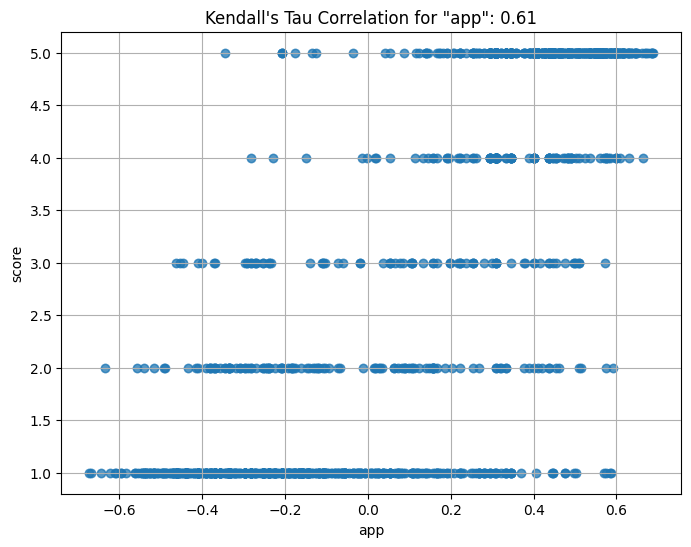

Kendall's Tau Correlation Coefficient for "services": 0.50


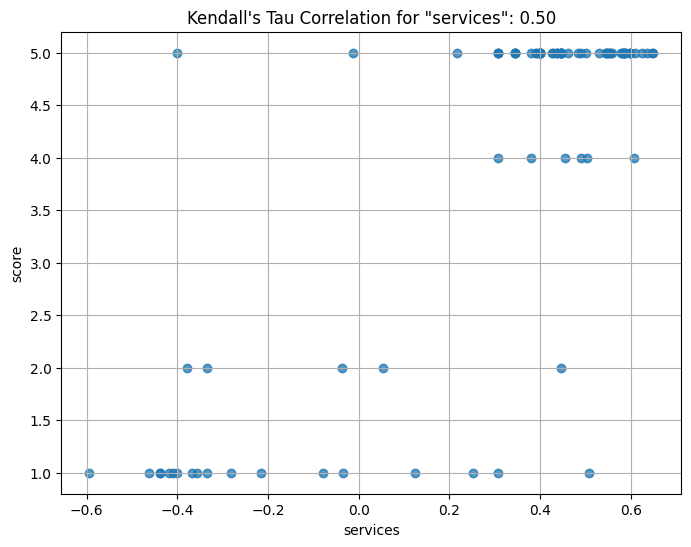

Kendall's Tau Correlation Coefficient for "custom": 0.49


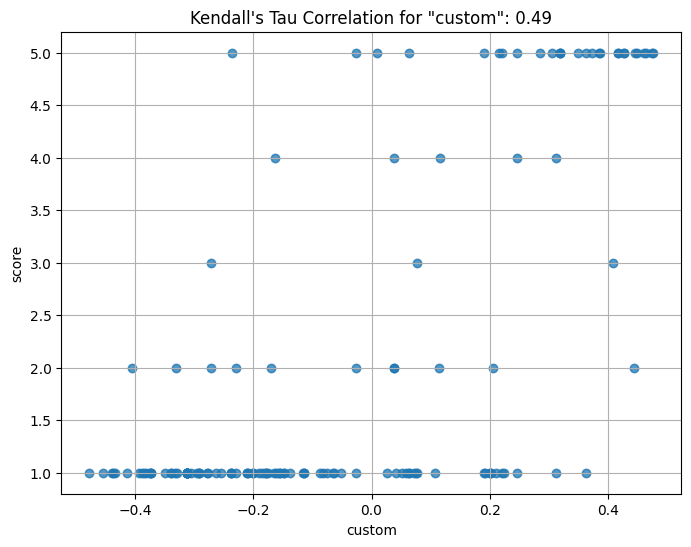

Kendall's Tau Correlation Coefficient for "user": 0.54


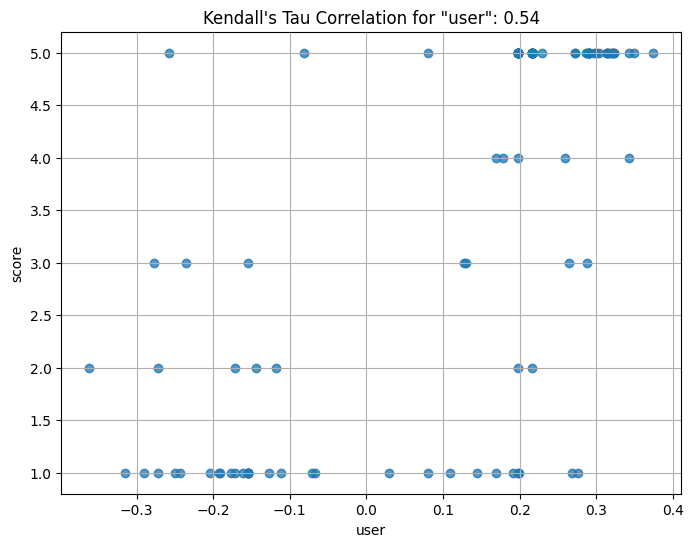

Kendall's Tau Correlation Coefficient for "experience": 0.65


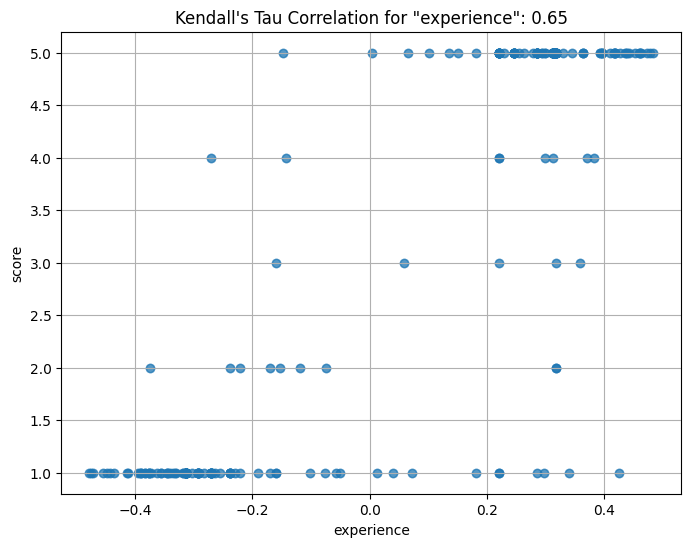

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Define empty lists to store aspects and correlations
aspects = []
correlations = []

def plot_kendalltau_correlation(data, aspects_to_analyze):
    for aspect in aspects_to_analyze:
        # Filter rows where the aspect column is non-zero
        filtered_data = data[data[aspect] != 0]

        # Calculate the Kendall's Tau correlation coefficient between the aspect and 'score'
        correlation, _ = kendalltau(filtered_data[aspect], filtered_data['score'])

        print(f'Kendall\'s Tau Correlation Coefficient for "{aspect}": {correlation:.2f}')

        # Append aspect and correlation to the lists
        aspects.append(aspect)
        correlations.append(correlation)

        # Plot the scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(filtered_data[aspect], filtered_data['score'], alpha=0.5)
        plt.title(f'Kendall\'s Tau Correlation for "{aspect}": {correlation:.2f}')
        plt.xlabel(aspect)
        plt.ylabel('score')
        plt.grid(True)
        plt.show()

# Load your data (replace 'your_data.csv' with your file path)
data = pd.read_csv('output_file.csv')

# List of aspects to analyze
aspects_to_analyze = ['time', 'website', 'update', 'helpful', 'information',
                      'staff', 'check in', 'service', 'booking', 'log', 'flight',
                      'response', 'customer', 'ticket', 'passenger', 'app', 'services',
                      'custom', 'user', 'experience']  # Add more aspects as needed

# Call the function to analyze and plot the correlations for each aspect
plot_kendalltau_correlation(data, aspects_to_analyze)


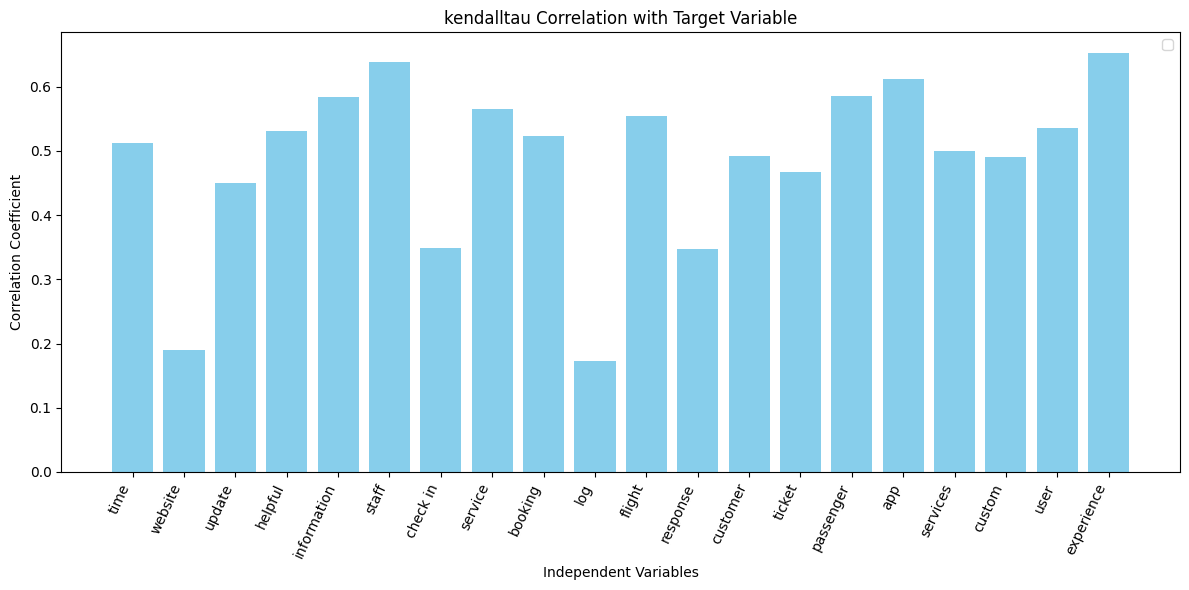

In [31]:
import matplotlib.pyplot as plt


# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(aspects, correlations, color='skyblue')
plt.title(f'kendalltau Correlation with Target Variable')
plt.xlabel('Independent Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=65, ha='right')  # Adjust rotation and horizontal alignment as needed
plt.legend()
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

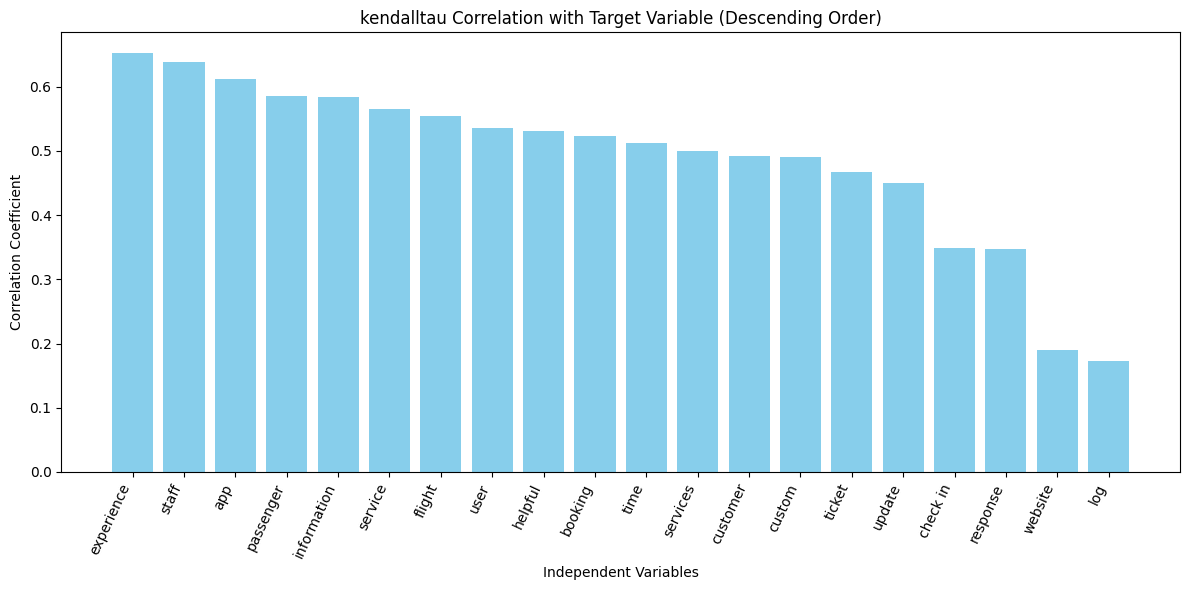

In [32]:
import matplotlib.pyplot as plt

# Sort the aspects and correlations together in descending order
sorted_data = sorted(zip(aspects, correlations), key=lambda x: x[1], reverse=True)

# Unzip the sorted data
sorted_aspects, sorted_correlations = zip(*sorted_data)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_aspects, sorted_correlations, color='skyblue')
plt.title(f'kendalltau Correlation with Target Variable (Descending Order)')
plt.xlabel('Independent Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=65, ha='right')  # Adjust rotation and horizontal alignment as needed
plt.tight_layout()  # Ensure labels are not cut off
plt.show()
